# Simulations Exercises

In [1]:
import numpy as np
import pandas as pd

### 1. How likely is it that you roll doubles when rolling two dice?

* _answer_: __There is about a 16.7% chance that you will roll doubles when rolling two dice.__

In [149]:
outcomes = [1, 2 ,3, 4, 5, 6]
n_simulations = 1_000_000
n_trials = 2 # number of dice

rolls = np.random.choice(outcomes, size=(n_simulations, n_trials))
val = [True for roll in rolls if np.all(roll == roll[0])]
print(len(val)/len(rolls)*100)



16.7096


### 2. If you flip 8 coins, what is the probability of getting exactly 3 heads? What is the probability of getting more than 3 heads?

_answer1_: __There is about 21.85% chance to get exactly 3 heads.__

_answer2_: __There is about 63.69% chance to get more than 3 heads__

In [3]:
outcomes = [True, False] # Use True if it's heads, False if it's Tails
n_simulations = 1_000_000
n_trials = 8 # number of coins

flips = np.random.choice(outcomes, size=(n_simulations, n_trials))

sum_of_flips = flips.sum(axis=1)
heads_3 = (sum_of_flips == 3).sum()
more_than3 = (sum_of_flips > 3).sum()

print(f'There is about {heads_3/len(flips)*100:0.2f}% chance to get exactly 3 heads.')
print(f'There is about {more_than3/len(flips)*100:0.2f}% chance to get more than 3 heads')

There is about 21.87% chance to get exactly 3 heads.
There is about 63.72% chance to get more than 3 heads


### 3. There are approximitely 3 web development cohorts for every 1 data science cohort at Codeup. Assuming that Codeup randomly selects an alumni to put on a billboard, what are the odds that the two billboards I drive past both have data science students on them?

_answer_: __There is about 6.29% chance for both billboards to be data science.__

In [4]:

# True is a data science course, False is web_dev
outcomes = [True, False, False, False] 

n_simulations = 1_000_000
n_trials = 2 # number of billboards

billboards = np.random.choice(outcomes, size=(n_simulations, n_trials))

sum_of_billboards = billboards.sum(axis=1) # sums number of Trues within each array

two_billboards = (sum_of_billboards == 2).sum() # Counts number of sum of 2 billboards

p = round(two_billboards/len(billboards) * 100, 2)
print(f'There is about {p}% chance for both billboards to be data science.')




There is about 6.26% chance for both billboards to be data science.


### 4. Codeup students buy, on average, 3 poptart packages (+- 1.5) a day from the snack vending machine. If on monday the machine is restocked with 17 poptart packages, how likely is it that I will be able to buy some poptarts on Friday afternoon?

_answer_: __There is about a 67% likelihood that you could buy at least 1 poptart.__

In [36]:
daily_drawdown= np.random.normal(3.0, 1.5, (1000000, 5))
weekly_sum = daily_drawdown.sum(axis=1)
weekly_sum_rounded = np.round(weekly_sum)
times_i_can_buy = (weekly_sum_rounded < 17).sum() # Choose to use 16.5 to r
p = round((times_i_can_buy/len(daily_drawdown)) * 100)
print(f'There is about a {p}% likelihood that you could buy at least 1 poptart.')


There is about a 67% likelihood that you could buy at least 1 poptart.


### 5. Compare Heights

* Men have an average height of 178 cm and standard deviation of 8cm.
* Women have a mean of 170, sd = 6cm.
* Since you have means and standard deviations, you can use np.random.normal to generate observations.
* If a man and woman are chosen at random, P(woman taller than man)?

_answer_: __The probability that a female is taller than a male at random is 21%__

In [45]:
male_avg_height = np.random.normal(178, 8, 100000)
female_avg_height = np.random.normal(170, 6, 100000)
count_of_taller_females = (female_avg_height > male_avg_height).sum()
p = round(count_of_taller_females/len(male_avg_height) * 100)
print(f'The probability that a female is taller than a male at random is {p}%')




The probability that a female is taller than a male at random is 21%


### 6. When installing anaconda on a student's computer, there's a 1 in 250 chance that the download is corrupted and the installation fails. What are the odds that after having 50 students download anaconda, no one has an installation issue? 100 students?

* 50 Students?
_answer_: __There is an 82% chance that no one has had an installation issue for 50 students.__


* 100 Students?
_answer_: __There is an 67% chance that no one has had an installation issue for 100 students.__


* What is the probability that we observe an installation issue within the first 150 students that download anaconda?
_answer_: __There is an 33% chance that there will be an installation issue within the first 150 students.__



* How likely is it that 450 students all download anaconda without an issue?
_answer_: __There is an 16% chance that no one has had an installation issue for 450 students.__



In [79]:
a_outcomes = [False for n in range(249)] # To generate 249 falses as outcomes
# Add the 1 True value where the installation issue occurs
a_outcomes.append(True) 

students50, students100 = 50, 100
n_simulations = 1_000_000


anaconda_failures = np.random.choice(a_outcomes, size=(n_simulations, 50))
sum_of_failures = anaconda_failures.sum(axis=1)
num_of_failures = (sum_of_failures == 0).sum()
p = round(num_of_failures/len(anaconda_failures) * 100)
print(p)


16


### 7. There's a 70% chance on any given day that there will be at least one food truck at Travis Park. However, you haven't seen a food truck there in 3 days. How unlikely is this?

_answer_: __There is a 2.68% likelihood that the food truck will not show up for 3 days in a row.__

### How likely is it that a food truck will show up sometime this week?

_answer_: __There is a 99.98% likelihood that the food truck will show up sometime this week.__

In [176]:
# Create bool calcuations where True is that the 70% food truck showed up
# truck_outcomes = [True for n in range(70)]

# # Add the False values for the 30% chance that it doesn't happen
# truck_outcomes.extend([False for n in range(30)])
truck_showsup = [True, False]

days_to_test = 3 # because we are testing multiple day periods
n_simulations = 1_000_000


food_truck_days = np.random.choice(truck_showsup, size=(n_simulations, days_to_test), p=(.70, .30))
num_of_no_shows = (food_truck_days.sum(axis=1) == 0).mean() * 100
num_of_no_shows

2.6761

### 8. If 23 people are in the same room, what are the odds that two of them share a birthday? What if it's 20 people? 40?

* 23 People

 *  _answer_: __There is a 51% chance that someone will have the same birthday as someone else.__

* 20 People

 *  _answer_: __There is a 41% chance that someone will have the same birthday as someone else.__
 
* 40 People

 *  _answer_: __There is a 89% chance that someone will have the same birthday as someone else.__

In [233]:
birthdays = [n for n in range(365)] # Because there are 365 days in a year

number_of_people = 40 
n_simulations = 100_000


birthday_iterations = np.random.choice(birthdays, size=(n_simulations, number_of_people))

num_of_birthdays_in_common = 0

for arr in birthday_iterations:
    day, count = np.unique(arr, return_counts=True)
    _ = day[count > 1]
    if len(_) != 0:
        num_of_birthdays_in_common += 1

p = round(num_of_birthdays_in_common/len(birthday_iterations) * 100)

# Mage Duel!

### Let's use what we've learned to play a mage duel!

* Imagine your wizard has 6d4 health points and you have spells that do 6d4 damage. "6d4" means rolling six 4-sided dice and summing the result.

* Your opposing mage has 4d6 health points and spells that do 4d6. "4d6" means rolling four six-sided dice and summing the result.

* Exercises

* Simulate mage duels to answer who is the more powerful mage?

* Before running simulations, do you have a hypothesis of which mage will win? Do you have a hunch? Write it down. This is your first exercise.
    * ___I think the wizard with 6d4 will win because of the increase in the number of dice, despite the lower values of each dice.___


* Simulate 10 mage duels. Is there a clear winner?

    * ___The wizard with the 6d4 won 70% of the duels, which is a clear winner.___

* Run that 10 duel simulation again. Was the answer similar?

    * ___The wizard with the 6d4 won 40% of the duels, which is a clear loser.___

* Do the results change much at 100 duels?

    * ___The wizard with the 6d4 won 45% of the duels, which isn't a clear winner/loser.___
    
* Now, simulate 10,000 mage duels. Is there a clear winner?

    * ___The wizard with the 6d4 won 55% of the duels, which is a slight advantage for the wizard.___

In [191]:
six_sided_dice = [1,2,3,4,5,6]
four_sided_dice = [1,2,3,4]

num_of_duels = 10000

wizard_won = list()

def wizard():
    ''' This is to simulate each of the wizard's weighted roll
    6d4
    '''
    return np.random.choice(four_sided_dice, size=(1, 6)).sum(axis=1)

def opponent():
    ''' This is to simulate each of the wizard's opponent's weighted roll
    4d6
    '''
    return np.random.choice(six_sided_dice, size=(1, 4)).sum(axis=1)

for each_battle in range(num_of_duels):
    wizard_hp = wizard()
    opposing_wizard_hp = opponent()
    game_over = False
    
    wizard_goes_first = np.random.choice([True, False], size=1)[0]
    
    while not game_over:
        if wizard_hp < 0 or opposing_wizard_hp < 0:
            game_over = True
        else:
            attack = 0
            if wizard_goes_first:
                attack = wizard()
                opposing_wizard_hp -= attack
            else:
                attack = opponent()
                wizard_hp -= attack
            wizard_goes_first = not wizard_goes_first          
    if wizard_hp > 0:
#         print('Wizard won!')
        wizard_won.append(True)
    else:
#         print('Wizard lost')
        wizard_won.append(False)
    
print(np.array(wizard_won).mean())
            
        
    


0.5486


# Chuck-a-luck

### Exercises:

* What are your chances of getting an outcome payout of 2? (where we earned 3 on the 1 ante)

    * ___Your chances for this outcome is about 4.77%.___

* What are your chances of getting an payout of 1?

    * ___Your chances for this outcome is about 6.9%.___

* What are your chances of getting a payout of 0 where you ante 1 and win 1?

    * ___Your chances for this outcome is about 35%.___

* What are your chances of getting a payout of -1 where you ante up, but don't win anything?

    * ___Your chances for this outcome is about 57.7%.___

* What is the average cost/gain per game? (think of averaging the total payout calculation across all simulations)

    * ___Average cost/gain per game is a loss of .4979 per game.___


* Chart out a histogram of all the outcomes of those 1,000,000 games

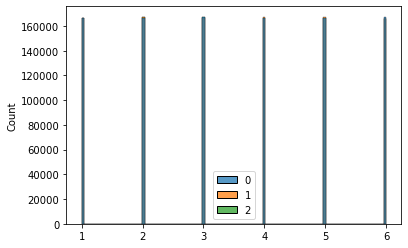

* Is this really a fair game of 1/6 + 1/6 + 1/6 odds?

    * ___Not even close, your cumulative chance to make any money is about 11.5%.___




* If you play 1,000,000 games in a row, what are your winnings or losses?
 * ___My losses would be 499,768 dollars, so no thank you...___



In [243]:
outcomes = [1, 2 ,3, 4, 5, 6]
n_simulations = 1000000
n_trials = 3 # number of dice
number_chosen = 1

house_rolls = np.random.choice(outcomes, size=(n_simulations, n_trials))
your_counts = np.array([np.count_nonzero(roll == number_chosen) for roll in house_rolls])

your_counts.sum() - n_simulations

-499768

<AxesSubplot:ylabel='Count'>

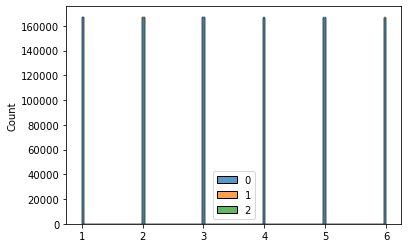

In [244]:
import seaborn as sns

sns.histplot(house_rolls)